<div>
<img src="Sales.png" width="600" align="left"/>
</div>

# Next Years Sales Goals

## VP of Sales:

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from env import *
from acquire import *
from prepare import *

In [42]:
def get_superstore_data():
    filename = 'superstore_data.csv'
    
    if not os.path.exists(filename):
        sql_db = "superstore_db"
        url = get_db_url(sql_db)
        
        query = '''
                    SELECT * 
                    FROM orders
                    JOIN categories USING(`Category ID`)
                    JOIN products USING(`Product ID`)
                    JOIN regions USING(`Region ID`)
                '''

        df = pd.read_sql(query,url)
        df.to_csv(filename, index=False)
        print(f"Saving {filename}...")
        return df
    
    else:
        print(f"File {filename} already exists. Loading {filename}...")
        
        return pd.read_csv(filename,index_col=False)

In [47]:
def clean_superstore_data(df):
    # set datetime data type
    df['Order Date']=pd.to_datetime(df['Order Date'])
    
    # set 'Date' column as index and sorted
    df = df.set_index("Order Date").sort_index()
    
    # feature engineering: added 'month' column using index
    df['month'] = df.index.month_name()
    
    # feature engineering: added 'year' column using index
    df['year'] = df.index.year
    
    # feature engineering: added 'year' column using index
    df['day'] = df.index.day_name()
    
    # rename columns to python naming conventions ie: snake_case
    df.columns = (df.columns
                .str.replace(' ', '_', regex=True)
                .str.lower()
             )
    return df

In [48]:
superstore_df = get_superstore_data()

File superstore_data.csv already exists. Loading superstore_data.csv...


In [49]:
superstore_df = clean_superstore_data(superstore_df)

### What should our sales goals for 2018 be?

In [52]:
superstore_df.columns

Index(['region_id', 'product_id', 'category_id', 'order_id', 'ship_date',
       'ship_mode', 'customer_id', 'segment', 'country', 'city', 'state',
       'postal_code', 'sales', 'quantity', 'discount', 'profit', 'category',
       'sub-category', 'product_name', 'region_name', 'month', 'year', 'day'],
      dtype='object')

In [53]:
keeper_columns = ['sales', 'quantity','profit','month', 'year', 'day']

In [54]:
superstore_df_subset = superstore_df[keeper_columns]

In [55]:
superstore_df_subset

,sales,quantity,profit,month,year,day
Order Date,,,,,,
2014-01-04,272.736,3.0,-64.7748,January,2014,Saturday
2014-01-04,3.540,2.0,-5.4870,January,2014,Saturday
2014-01-04,11.784,3.0,4.2717,January,2014,Saturday
2014-01-09,31.200,3.0,9.7500,January,2014,Thursday
2014-01-09,9.344,2.0,1.1680,January,2014,Thursday
...,...,...,...,...,...,...
2017-12-30,52.776,3.0,19.7910,December,2017,Saturday
2017-12-30,90.930,7.0,2.7279,December,2017,Saturday
2017-12-30,323.136,4.0,12.1176,December,2017,Saturday


In [56]:
superstore_df_subset

,sales,quantity,profit,month,year,day
Order Date,,,,,,
2014-01-04,272.736,3.0,-64.7748,January,2014,Saturday
2014-01-04,3.540,2.0,-5.4870,January,2014,Saturday
2014-01-04,11.784,3.0,4.2717,January,2014,Saturday
2014-01-09,31.200,3.0,9.7500,January,2014,Thursday
2014-01-09,9.344,2.0,1.1680,January,2014,Thursday
...,...,...,...,...,...,...
2017-12-30,52.776,3.0,19.7910,December,2017,Saturday
2017-12-30,90.930,7.0,2.7279,December,2017,Saturday
2017-12-30,323.136,4.0,12.1176,December,2017,Saturday


In [69]:
unique_quantity = superstore_df_subset['quantity'].unique().astype(str)

In [70]:
unique_quantity

array(['3.0', '2.0', '1.0', '6.0', '7.0', '4.0', '5.0', '10.0', '12.0',
       '13.0', '8.0', '9.0', '11.0', '14.0'], dtype='<U32')

In [64]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ValueError: We need at least 1 word to plot a word cloud, got 0.

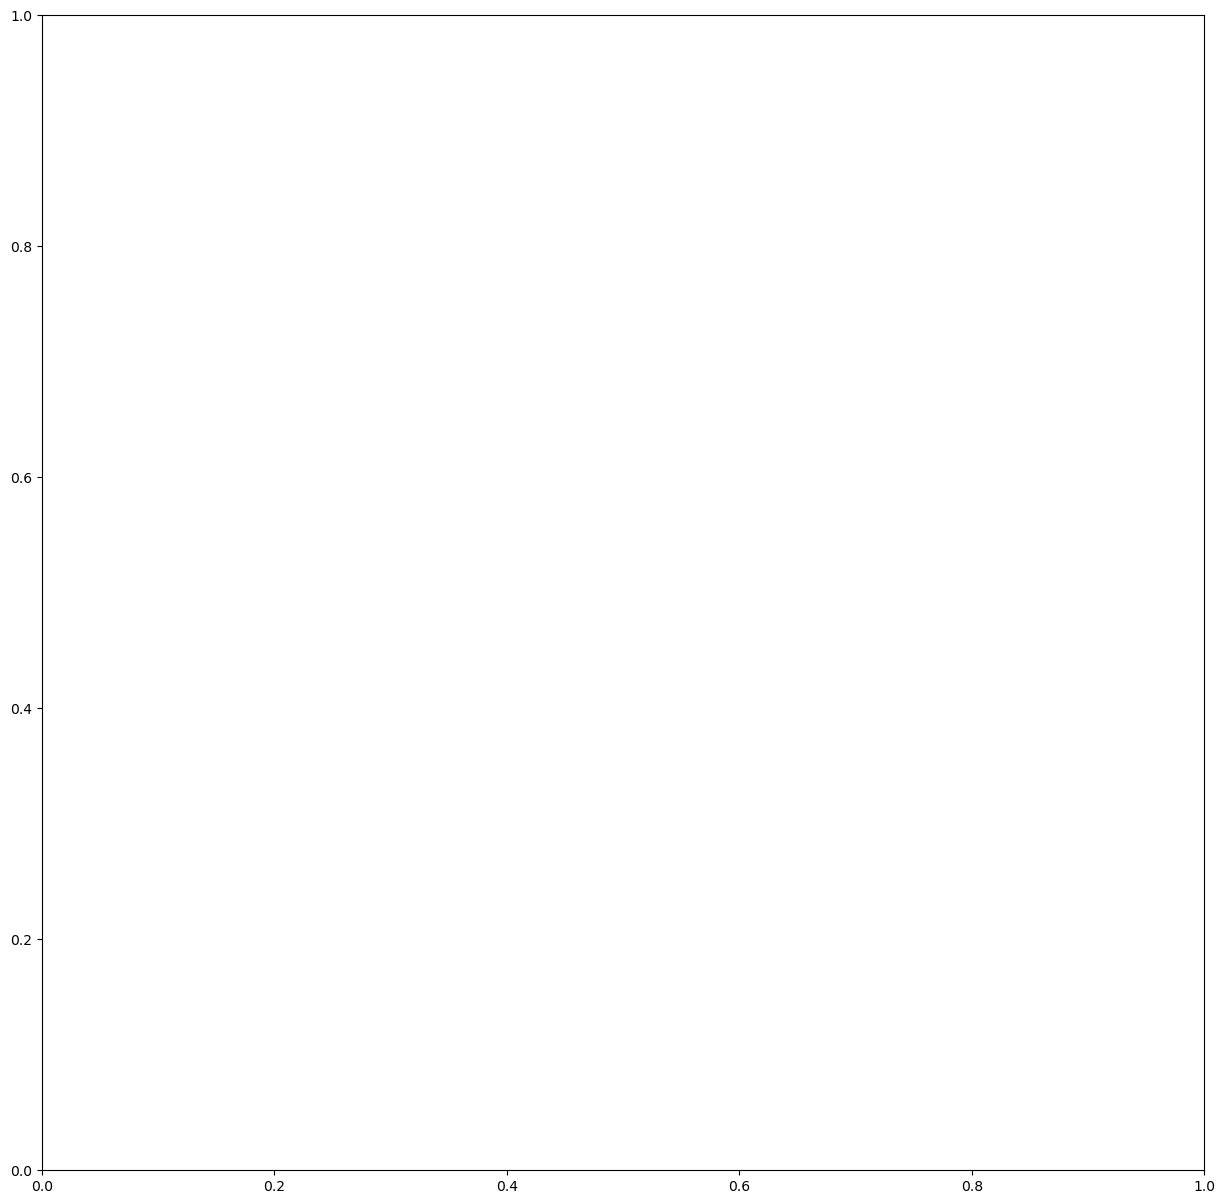

In [71]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(unique_quantity))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data cloud of Quantities', color='#062175', fontsize=25, ha='center')
plt.show()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

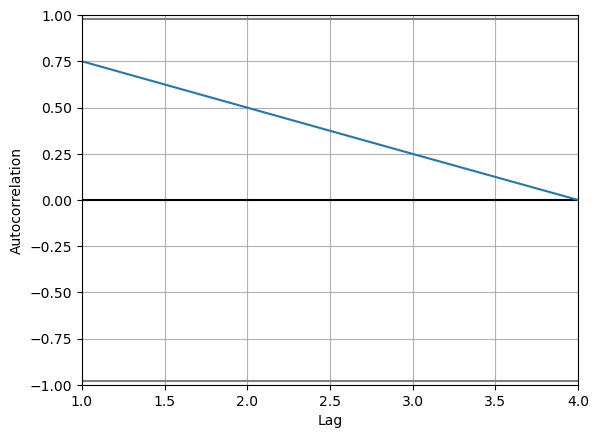

In [63]:
pd.plotting.autocorrelation_plot(superstore_df_subset.resample('Y').mean())

In [82]:
only_sales = superstore_df_subset[superstore_df_subset['sales']>0]['sales']

In [89]:
only_sales_nonzero = only_sales.resample('W').mean()[only_sales.resample('W').mean()>0]

In [90]:
result = sm.tsa.seasonal_decompose(only_sales_nonzero)
result.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

### Are there any additional metrics should we track?